<a href="https://colab.research.google.com/github/dataponti/panorama_covid_19/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada pelo recém-descoberto SARS-CoV-2. Apesar do agente infectante ser genericamente chamado de coronavírus, esse é apenas um novo representante da família dos coronavírus.  

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Desde dezembro de 2019, quando os primeiros casos foram detectados na cidade de Wuhan, na China, diversos estudos têm sido realizados no mundo todo, a fim de trazer mais clareza sobre a doença e seus efeitos de curto, médio e longo prazo.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o momento (outubro de 2022), observamos que a maioria da infecções ocorrem de maneira leve ou assintomática, com recuperação após um tratamento simples, e sem claras sequelas.

No entanto, outras pessoas adquirem formas graves da doença, mas ainda assim recuperam-se após internação e procedimentos mais invasivos, como a intubação orotraqueal. Muitos outros casos graves da doença acabam resultando na morte do infectado.  

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil e no mundo, realizaremos uma análise sobre os dados públicos da doença. Especificamente, pretendemos responder algumas perguntas:

* Como estavam os principais indicadores da COVID até o momento em que a pandemia foi declarada?
* Como se deu a evolução da doença nos primeiros 6 meses desde o primeiro caso registrado?
* Quais foram os países onde se teve maior adesão à vacinação? Que tipo de correlação existe entre o total de vacinados e as demais variáveis?
* Atualmente, como estão os principais indicadores da pandemia? Podemos construir alguma correlação entre os dados de total de casos e de mortos e características intrínsecas da população (porcentagem de idosos, PIB *per capita*, densidade populacional, por exemplo)?

## Obtenção dos Dados

Como base para nosso projeto, usaremos os dados coletados e reunidos pela [Our World in Data](https://ourworldindata.org/coronavirus), organização pela qual podemos ter acesso a dados de fontes oficiais sobre inúmeros problemas que afligem a população mundial. Os dados são atualizados diariamente enquanto a pandemia está em vigor.

Baixaremos os dados a partir desse link: [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data). Usaremos o formato `csv` neste projeto.

Nessa situação, enfrentamos uma dificuldade natural da circunstância: como a doença era desconhecida da ciência quando vimos os primeiros infectados, muitos diagnósticos podem ter sido equivocados na época, e consequentemente vários casos de COVID não devem ter sido computados. 

Ademais, a causa de internação ou da morte dos primeiros pacientes pode ter sido inexatamente atribuída a outras causas que não fossem a COVID (um erro na direção oposta também pode ocorrer algumas vezes, trazendo imprecisão aos nossos dados). 

Podemos ainda mencionar que as várias organizações de um mesmo país, assim como os grupos de estados e cidades, dele, podem realizar os levantamentos estatísticos com metodologias diferentes, aplicando vieses próprios. Nesse caso, o conflito entre as diversas fontes pode adicionar bastante ruído ao projeto. 

Feitas essas advertências, é natural que os resultados aqui expostos possam diferir de outras publicações. De todo modo, esperamos trazer alguns *insights* sobre a pandemia de COVID, que ainda hoje (outubro de 2022) não foi plenamente superada. 



### Dicionário de Variáveis
* `iso_code` - código alpha-3 do ISO 3166, isto é, código de três letras designando o país
* `continent` - o continente do país
* `location` -  o país
* `date` - a data observada
* `total_cases` - total de casos confirmados de COVID-19. A contagem pode incluir casos prováveis, quando reportados
* `new_cases` - novos casos confirmados de COVID-19. A contagem pode incluir casos prováveis, quando reportados. Em casos raros, quando a fonte divulgar um dado negativo devido a uma correção dos dados, o valor é computado como NA
* `new_cases_smoothed` - novos casos confirmados de COVID-19, com uma suavização de 7 dias. A contagem pode incluir casos prováveis, quando reportados
* `total_deaths` - total de mortes atribuídas à COVID-19. A contagem pode incluir mortes prováveis, quando reportadas
* `new_deaths` - novas mortes atribuídas à COVID-19. A contagem pode incluir mortes prováveis, quando reportadas. Em casos raros em que as fontes relatam um valor negativo devido a uma correção nos dados, definimos o valor como NA
* `new_deaths_smoothed` - novas mortes atribuídas à COVID-19, com uma suavização de 7 dias. A contagem pode incluir casos prováveis, quando reportados
* `total_cases_per_million` - total de casos confirmados de COVID-19 por milhão de habitantes no país considerado. A contagem pode incluir casos prováveis, quando reportados
* `new_cases_per_million` - novos casos confirmados de COVID-19 por milhão de habitantes no país considerado. A contagem pode incluir casos prováveis, quando reportados
* `new_cases_smoothed_per_million` - novos casos confirmados de COVID-19 por milhão de habitantes no país considerado, com uma suavização de 7 dias. A contagem pode incluir casos prováveis, quando reportados
* `total_deaths_per_million` - total de mortes atribuídas à COVID-19 por milhão de habitantes no país considerado. A contagem pode incluir mortes prováveis, quando reportadas
* `new_deaths_per_million` - novas mortes atribuídas à COVID-19 por milhão de habitantes no país considerado. A contagem pode incluir casos prováveis, quando reportados
* `new_deaths_smoothed_per_million` - novas mortes atribuídas à COVID-19 por milhão de habitantes no país considerado, com uma suavização de 7 dias. A contagem pode incluir casos prováveis, quando reportados
* `reproduction_rate` - estimativa em tempo real do número efetivo de reprodução da infecção (R) da COVID-19, isto é, o número médio de indivíduos infectado por cada portador do vírus nas condições existentes em um certo momento
* `icu_patients` - número de pacientes com COVID-19 internados em UTI (intensive care unit - ICU, em inglês) no dia considerado
* `icu_patients_per_million` - número de pacientes com COVID-19 internados em UTI (intensive care unit - ICU, em inglês) no dia considerado por milhão de pessoas no país considerado
* `hosp_patients` - número de pacientes com COVID-19 hospitalizados no dia considerado
* `hosp_patients_per_million` - número de pacientes com COVID-19 hospitalizados no dia considerado por milhão de pessoas no país considerado
* `weekly_icu_admissions` - número de pacientes com COVID-19 admitidos em UTI na semana considerada
* `weekly_icu_admissions_per_million` - número de pacientes com COVID-19 admitidos em UTI em uma determinada semana por milhão de habitantes 
* `weekly_hosp_admissions` - número de pacientes com COVID-19 admitidos no hospital na semana considerada
* `weekly_hosp_admissions_per_million` - número de pacientes com COVID-19 admitidos no hospital por milhão de habitantes na semana considerada 
* `total_tests` - total de testes de COVID-19
* `new_tests ` - novos testes de COVID-19 (contados apenas para dias consecutivos)
* `total_tests_per_thousand` - total de testes de COVID-19 por mil pessoas
* `new_tests_per_thousand` - novos testes de COVID-19 por mil pessoas
* `new_tests_smoothed` - novos testes de COVID-19, com suavização de 7 dias. Para os países que não divulgam dados de testes diariamente, assume-se que os testes variam igualmente a cada dia ao longo do período em que não há registros. Isso produz uma sequência sem dados faltantes, que é então suavizada ao longo de 7 dias
* `new_tests_smoothed_per_thousand` - novos testes de COVID-19 por mil habitantes, com suavização de 7 dias
* `positive_rate` - média móvel de 7 dias da porcentagem de testes positivos
* `tests_per_case` - quantidade de testes positivos para cada teste que resulta positivo
* `tests_units` - Unidade usada pelo país para reportar os dados de testes
* `total_vaccinations` - quantidade de doses administradas de vacinas contra a COVID-19
* `people_vaccinated` - quantidade de pessoas que recebeu ao menos uma dose da vacina
* `people_fully_vaccinated` - quantidade de pessoas com esquema de vacinação completo (segundo o protocolo inicial)
* `total_boosters` - quantidade de doses de reforço aplicadas
* `new_vaccinations` - quantidade de doses ministradas no dia considerado, contado apenas em dias consecutivos de vacinação
* `new_vaccinations_smoothed` - quantidade de doses ministradas no dia considerado, com suavização de 7 dias. Para os países que não divulgam dados de vacinação diariamente, assume-se que estas variam igualmentea a cada dia ao longo do período em que não há registros. Isso produz uma sequência sem dados faltantes, que é então suavizada ao longo de 7 dias
* `total_vaccinations_per_hundred` - quantidade de doses de vacinas de COVID-19 ministradas por cada 100 habitantes
* `people_vaccinated_per_hundred` - pessoas que receberam ao menos uma dose da vacina por cada 100 habitantes
* `people_fully_vaccinated_per_hundred` - pessoas com esquema de vacinação completo por cada 100 habitantes 
* `total_boosters_per_hundred` -  doses de reforço aplicadas por cada 100 habitantes
* `new_vaccinations_smoothed_per_million` - quantidade de doses ministradas no dia considerado por milhão de habitantes, com suavização de 7 dias
* `new_people_vaccinated_smoothed` - quantidade de pessoas recebendo a primeira dose da vacina, com suavização de 7 dias
* `new_people_vaccinated_smoothed_per_hundred` - quantidade de pessoas recebendo a primeira dose da vacina para cada 100 habitantes, com suavização de 7 dias 
* `stringency_index` - medida baseada em 9 indicadores representando a resposta do país para a pandemia   
* `population` - população do país
* `population_density` - densidade demográfica do país
* `median_age` - mediana da idade do país (projeção da ONU para 2020)
* `aged_65_older` - porcentagem da população com 65 anos ou mais, segundo o ano mais recente
* `aged_70_older` - porcentagem da população com 70 anos ou mais em 2015
* `gdp_per_capita` - PIB *per capita* do país 
* `extreme_poverty` - porcentagem da população que vive em extrema pobreza, no ano mais recente em que o dado estiver disponível
* `cardiovasc_death_rate` - porcentagem de mortes por doenças cardiovasculares em 2017 
* `diabetes_prevalence` - porcentagem da população entre 20 e 79 anos em 2017 com diabetes
* `female_smokers` - porcentagem de mulheres fumantes, no último ano em que o dado está disponível  
* `male_smokers` - porcentagem de homens fumantes, no último ano em que o dado está disponível
* `handwashing_facilities` - porcentagem da população com acesso à instalações para lavar as mãos, no último ano em que o dado está disponível
* `hospital_beds_per_thousand` - leitos hospitalares para cada 1000 habitantes no ano mais recente em que o dado estava disponível desde 2010
* `life_expectancy` - Expectativa de vida desde o nascimento em 2019
* `human_development_index` - IDH (Índice de Desenvolvimento Humano), indicador que leva em consideração a expectativa de vida, a escolaridade e a renda *per capita* 
* `excess_mortality` - Diferença percentual entre o número reportado de mortes semanais ou mensais em 2020–2021 e o valor projetado de mortes no mesmo período em anos anteriores
* `excess_mortality_cumulative` - Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e o valor projetado de mortes acumuladas para o mesmo período com base nos anos anteriores
* `excess_mortality_cumulative_absolute` - Diferença absoluta entre o número divulgado de mortes desde 1 de janeiro de 2020 e o número projetado de mortes para o mesmo período baseado em anos anteriores
* `excess_mortality_cumulative_per_million` - Diferença absoluta entre o número divulgadode mortes desde 1 de janeiro de 2020 e o número projetado de mortes para o mesmo período baseado em anos anteriores por milhão de habitantes 

## Importando as bibliotecas e os dados 

Iniciaremos o projeto instalando ou importando alguns pacotes e bibliotecas. Em particular, baixamos a biblioteca `bar_chart_race` e o pacote `ffmpeg` para criarmos uma corrida de gráficos de barras. 

Para tratarmos e visualizarmos os dados, importaremos as bibliotecas `numpy`, `pandas`, `matplotlib` e `seaborn`.

Importaremos ainda a biblioteca `requests`, usada para realizarmos uma filtragem na lista de países que se encontra na coluna *location* dos dados que usaremos.

In [ ]:
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 22.5 MB/s 


In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
# importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import requests

pd.set_option('display.max_rows', None)

%matplotlib inline

Nos bloco abaixo, faremos o upload do arquivo e carregaremos os dados:

In [ ]:
# importar o dataset COVID-19 para um DataFrame
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
covid_world=pd.read_csv(url)

### Análise Exploratória dos Dados

Aqui, teremos nosso primeiro contato com os dados e prepararemo-los para as posteriores análises. Vamos verificar algumas entradas para entendermos como estão dispostos os dados. Depois, conferiremos as dimensões do *dataset*, as colunas dele, seus tipos e a quantidade de dados ausentes. 

Além disso, trocaremos o formato da coluna `date`, criaremos um *subdataset* ajustando a coluna `location` e definiremos algumas funções que serão úteis ao longo do projeto.


Conferindo as primeiras e últimas entradas, deduzimos que os dados devem estar com a coluna `location` em ordem alfabética e, dentro das linhas de uma mesma localidade, temos a coluna `date` em ordem cronológica.

In [ ]:
# Conferindo as primeiras entradas
covid_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
covid_world.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
220562,ZWE,Africa,Zimbabwe,2022-09-27,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220563,ZWE,Africa,Zimbabwe,2022-09-28,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220564,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220565,ZWE,Africa,Zimbabwe,2022-09-30,257465.0,56.0,25.143,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220566,ZWE,Africa,Zimbabwe,2022-10-01,257465.0,0.0,21.000,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
# Conferindo as dimensões do dataset
covid_world.shape

(220567, 67)

In [ ]:
# Colunas do dataset
covid_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Conferimos os tipos das colunas na célula abaixo. Percebemos que a coluna `date` está com tipo `object`, e trocaremo-lo por `datetime` na próxima célula.  

In [ ]:
#tipos das colunas
covid_world.dtypes

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

In [ ]:
# trocando o tipo da coluna date
covid_world['date'] =  pd.to_datetime(covid_world['date'])

Quanto à porcentagem de dados ausentes, é importante fazer uma ressalva: com uma rápida checagem como na célula abaixo, percebemos que aproximadamente 40% das colunas têm pelo menos metade dos dados ausentes. Isso parece problemático, mas algumas colunas, como `female_smokers`, `male_smokers` e `human_development_index`, são constantes para uma localização fixa, assim como a quantidade de linhas com uma mesma localização pode variar. 

Desse modo, faremos uma checagem de valores ausentes específica para cada localização, e plotaremos histogramas das porcentagens de valores ausentes por localidade. Percebemos, então, ao olhar pros histogramas, que temos bastantes informações nas colunas relativas aos números de casos e mortes. Concentraremos nossas atenções nesses tipos de dados.

In [ ]:
# porcentagem de dados ausentes
(covid_world.isnull().sum() / covid_world.shape[0]).sort_values(ascending=False)

weekly_icu_admissions_per_million             0.967674
weekly_icu_admissions                         0.967674
excess_mortality_cumulative_per_million       0.966178
excess_mortality_cumulative                   0.966178
excess_mortality_cumulative_absolute          0.966178
excess_mortality                              0.965965
weekly_hosp_admissions                        0.935652
weekly_hosp_admissions_per_million            0.935652
icu_patients                                  0.872746
icu_patients_per_million                      0.872746
hosp_patients_per_million                     0.860237
hosp_patients                                 0.860237
total_boosters_per_hundred                    0.850553
total_boosters                                0.850553
new_vaccinations                              0.769725
people_fully_vaccinated_per_hundred           0.744794
people_fully_vaccinated                       0.744794
people_vaccinated                             0.732290
people_vac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


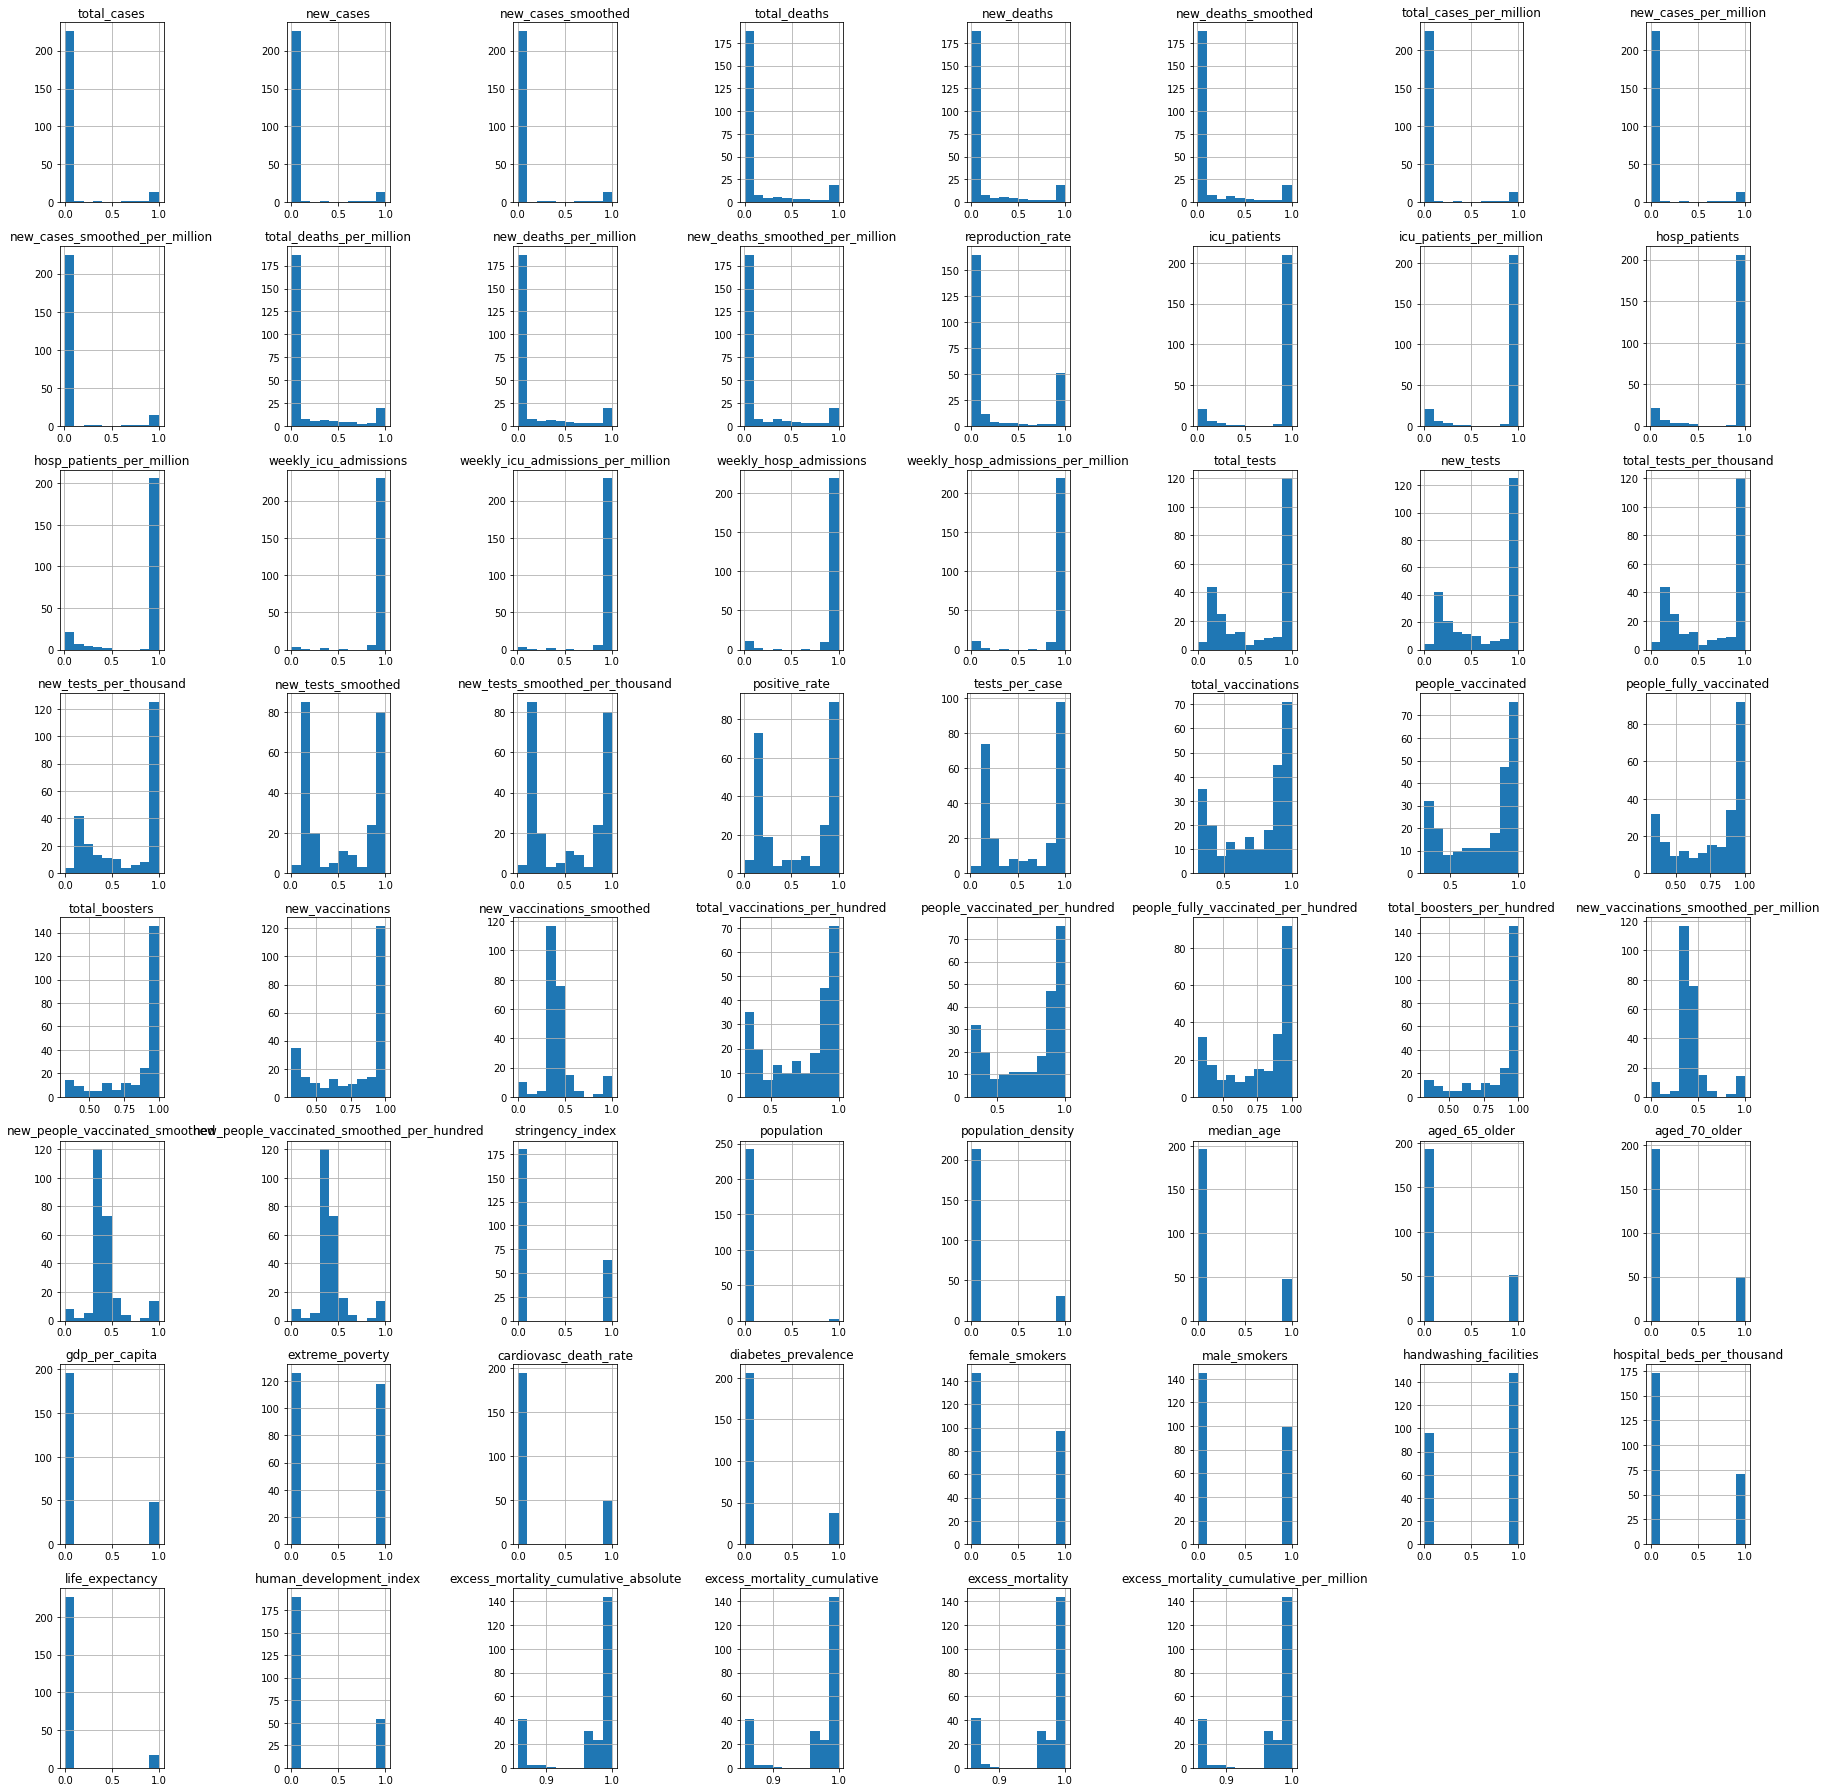

In [ ]:
covid_location = covid_world.select_dtypes(include='number').isnull().copy()
covid_location['location'] = covid_world['location'].copy()
covid_location_groupby = covid_location.groupby('location').sum()/covid_location.groupby('location').count()
fig, ax = plt.subplots(figsize=(25,25))
covid_location_groupby.hist(ax=ax)
plt.tight_layout()

Vamos analisar a lista de países que se encontram na coluna `location`. Para isso, usaremos a lista de países que se encontra nesse [link](https://www.worldometers.info/geography/alphabetical-list-of-countries/), e compararemo-la com a lista que se encontra nos nossos dados. Chamaremos a lista de localidades que não estão na lista do site de *excep* e eliminaremos manualmente algumas opções, criando a lista *exceptions*. A partir dessa última, limitaremos nosso dataset a uma lista apenas com países, chamando-o de `covid_countries`.   

In [ ]:
#checando a sequência de países
url = 'https://www.worldometers.info/geography/alphabetical-list-of-countries/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

countries_list_site = list(pd.read_html(r.text)[0]['Country'])

In [ ]:
excep=[]
for country in list(covid_world['location']):
  if not(country in countries_list_site) and not(country in excep):
    excep.append(country)
excep

['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cape Verde',
 'Cayman Islands',
 'Congo',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechia',
 'Democratic Republic of Congo',
 'Eswatini',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guernsey',
 'High income',
 'Hong Kong',
 'International',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Low income',
 'Lower middle income',
 'Macao',
 'Micronesia (country)',
 'Montserrat',
 'Myanmar',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Oceania',
 'Palestine',
 'Pitcairn',
 'Puerto Rico',
 'Saint Helena',
 'Saint Pierre and Miquelon',
 'Sint Maarten (Dutch part)',
 'South America',
 'Taiwan',
 'Timor',
 'Tokelau',
 'Turks and Caicos Islands',
 'United States',
 'United States Virgin Islands',
 'Upper middle income',
 'Vatican',
 'Wallis and

In [ ]:
exceptions = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'International', 'Low income', 'Lower middle income', 'North America', 'Oceania', 'South America', 'Upper middle income', 'Western Sahara', 'World']
countries_list=[x for x in list(covid_world['location'].unique()) if x not in exceptions]
covid_countries = covid_world[covid_world['location'].apply(lambda x : x in countries_list)].copy()

Adicionaremos aqui duas funções auxiliares: a primeira, *list_highest_locations*, nos retornará uma lista com os **n** primeiros países no ranking montado a partir de uma coluna específica de um subdataset de `covid_countries`. A segunda, *graph_location*, recebe um dataset **df** (normalmente, um subdataset de `covid_countries`), uma localidade **location**, uma coluna **col** e uma data **date** e retorna a Series obtida a partir de **df[col]**, indexada pelas datas anteriores a **date** e restrita apenas às linhas em que a localidade é **location**.   

In [ ]:
def list_highest_locations(dataf, col, data, n):
  df = dataf.loc[dataf.date == data, ['location', col]]
  df = df.sort_values(by=col, ascending=False)[0:n]
  return list(df['location'])

In [ ]:
def graph_location(df, location, date, col):
  df_location = df[df['location'] == location]
  df_location.set_index('date', inplace=True)
  df_location = df_location.loc[:date]
  return df_location[col]

## Primeiros momentos da doença e declaração de pandemia

A partir dos dados, podemos obter a data do primeiro caso registrado de COVID, e vimos que foi em 22 de janeiro de 2020. Nessa data, à exceção dos Estados Unidos, podemos ver que a doença está essencialmente concentrada na Ásia. 

Olhando para a China, vemos que não só 547 casos são registrados de uma vez, como existem 17 mortes registradas. Dada a magnitude dos valores, somos levados a crer que, possivelmente, a situação já era monitorada há algum tempo, mas não se tinha clareza suficiente sobre a doença, logo esses dados podem ter sido represados até uma divulgação oficial ser feita. Com efeito, segundo informação da Organização Pan Americana de Saúde, a descoberta do novo tipo de coronavírus foi comunicada em 07 de janeiro de 2020 (veja o [link](https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19) para mais informações).

In [ ]:
minimum_date=covid_countries[covid_countries['total_cases'] > 0]['date'].min()
covid_countries[(covid_countries['date']==minimum_date) & (covid_countries['total_cases'].isnull()==False) & (covid_countries['total_cases'] > 0)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
40558,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
100117,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,...,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
118115,MAC,Asia,Macao,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
184295,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
192861,TWN,Asia,Taiwan,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
195677,THA,Asia,Thailand,2020-01-22,4.0,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.10,77.15,0.777,NaN,NaN,NaN,NaN
207914,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


Ainda sobre datas, sabemos que o início da pandemia foi declarado pela OMS em 11 de março de 2020 (como referência, veja o [link](https://www.unasus.gov.br/noticia/organizacao-mundial-de-saude-declara-pandemia-de-coronavirus)). Guardaremos na variável `pand_date` essa data. 

In [ ]:
pand_date=pd.Timestamp(2020, 3, 11, 0)

Poucos dias antes do início da pandemia, podemos ver que, em escala global, a taxa de reprodução do vírus mantinha-se acima de 1 ao longo de março, e estava em tendência de alta, o que indicava a disseminação da doença.

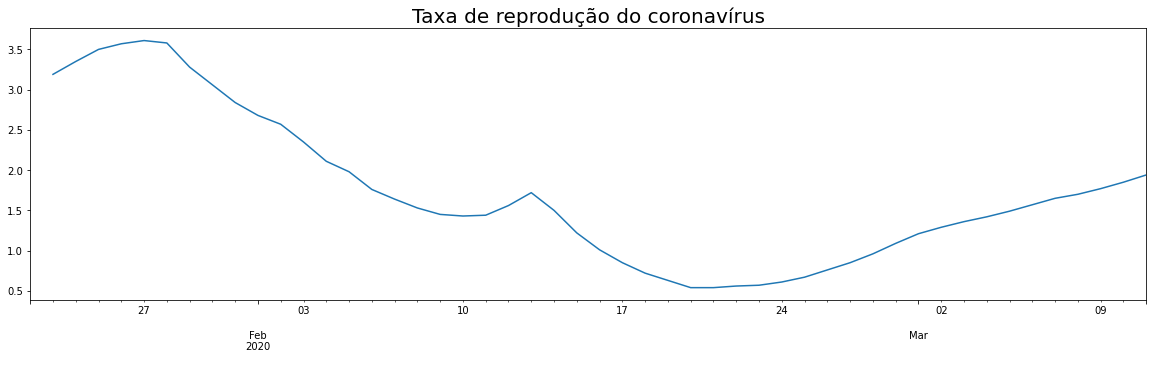

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
graph_location(covid_world, "World", pand_date, 'reproduction_rate').plot(kind='line', ax=ax)
ax.set_title("Taxa de reprodução do coronavírus", fontsize=20)
ax.set_xlabel(" ")
plt.show()

Abaixo, vemos o gráfico do número de novos casos ao longo do tempo dos 5 países com o maior número de casos totais até a data de declaração da pandemia. Percebemos que, no início de março, os números de casos da Itália começa a superar todos os demais países. 

Conseguimos lembrar das notícias chocantes da Itália no início de 2020, e a curva do gráfico abaixo evidencia o alto número de casos mostrados na época.

No segundo gráfico, vemos o número de hospitalizações e pacientes em UTI na Itália até a data de início da pandemia. 

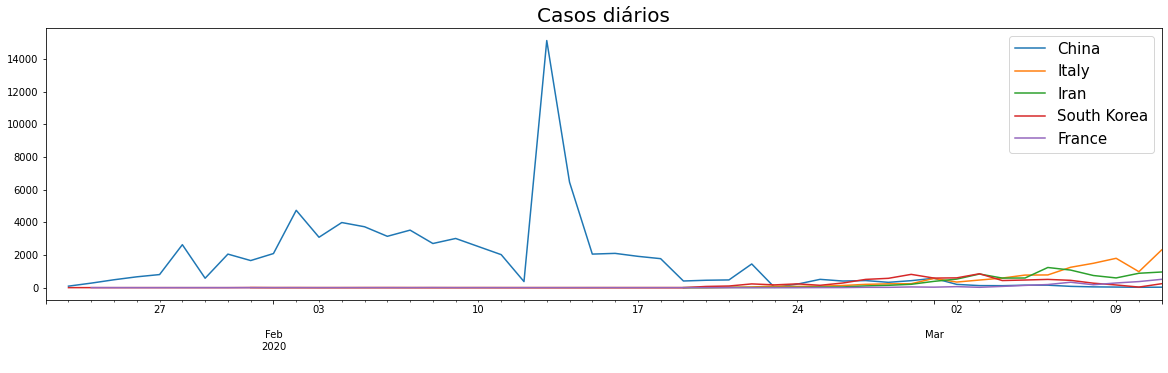

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
most_cases_beg = list_highest_locations(covid_countries, 'total_cases', pand_date, 5)
for country in most_cases_beg:
  graph_location(covid_world, country, pand_date, 'new_cases').plot(kind='line', ax=ax)
ax.legend(most_cases_beg, prop={'size': 15})
ax.set_title("Casos diários", fontsize=20)
ax.set_xlabel(" ")
plt.show()

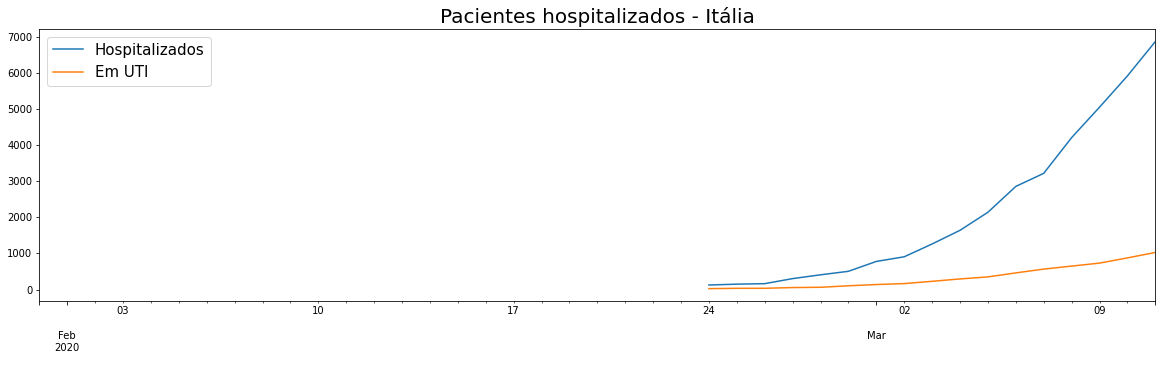

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
graph_location(covid_world, 'Italy', pand_date, 'hosp_patients').plot(kind='line', ax=ax)
graph_location(covid_world, 'Italy', pand_date, 'icu_patients').plot(kind='line', ax=ax)
ax.legend(['Hospitalizados', "Em UTI"], prop={'size': 15})
ax.set_xlabel(" ")
ax.set_title("Pacientes hospitalizados - Itália", fontsize=20)
plt.show()

## Seis primeiros meses da COVID-19

Aqui, analisaremos os seis primeiros meses da COVID, contados a partir da data do primeiro caso registrado em nossos dados. Registraremos a data final na variável `upper_date`.

In [ ]:
upper_date=pd.Timestamp(2020, 7, 22, 0)

Boa parte dos *displays* dessa seção serão gráficos de linha ou de barras. Assim, para simplificarmos os códigos, definiremos as duas funções abaixo, e aplicaremo-las no que segue. Definiremos também uma função que adicionará os valores acima de cada barra nos gráficos de barras.

Ressaltamos que, em todos os gráficos de linha, demarcaremos uma linha vertical tracejada no dia em que a pandemia foi declarada, para situar a evolução do indicador analisado no tempo. 

In [ ]:
def plot_linegraph(col1, n, df, col2, titulo):
  fig, ax = plt.subplots(figsize=(20,5))
  list_n = list_highest_locations(df, col1, upper_date, n)
  for country in list_n:
    graph_location(df, country, upper_date, col2).plot(kind='line', ax=ax)
  ax.legend(list_n, prop={'size': 15})
  plt.title(titulo, {'size': 20})
  plt.axvline(x=pd.Timestamp(2020, 3, 11, 0), color='r', ls='--', lw=5)
  ax.set_xlabel(" ")

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + y[0]/100, y[i], ha = 'center', fontsize=20)

In [ ]:
def bar_graph(dataf, col, n, data, kind, titulo):
  df = dataf.loc[dataf.date == data, ['location', col]].copy()
  df = df.sort_values(by=col, ascending=False)[0:n]
  if kind=='int':
    df[col]=df[col].astype(int)
  else:
    df[col]=df[col].apply(lambda x : round(x, 2))
  fig, ax = plt.subplots(figsize=(28, 10))
  plt.bar(x='location', height=col, data=df)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  addlabels(df, list(df[col]))
  plt.title(titulo, {'size': 25})
  plt.tight_layout()
  plt.show()

Nos primeiros *displays*, temos a evolução dos casos diários nos 5 países com mais casos ao fim dos 6 meses considerados e os países com maior número de casos por milhão de habitantes, dentre aqueles cuja população é de pelo menos um milhão. 

Naturalmente, essas estatísticas são distorcidas pela quantidade de testes realizados, mas são úteis para termos um olhar mais claro sobre a situação.

Destacamos aqui Estados Unidos e Brasil pelas aparições em ambos os gráficos, demonstrando alto grau de disseminação da doença em termos absolutos e relativos.


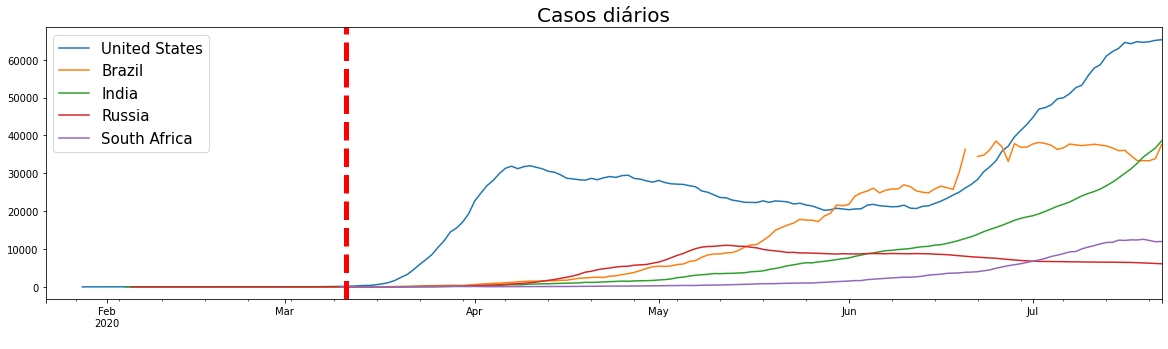

In [ ]:
# número de casos diários - absoluto
plot_linegraph('total_cases', 5, covid_countries, 'new_cases_smoothed', 'Casos diários')

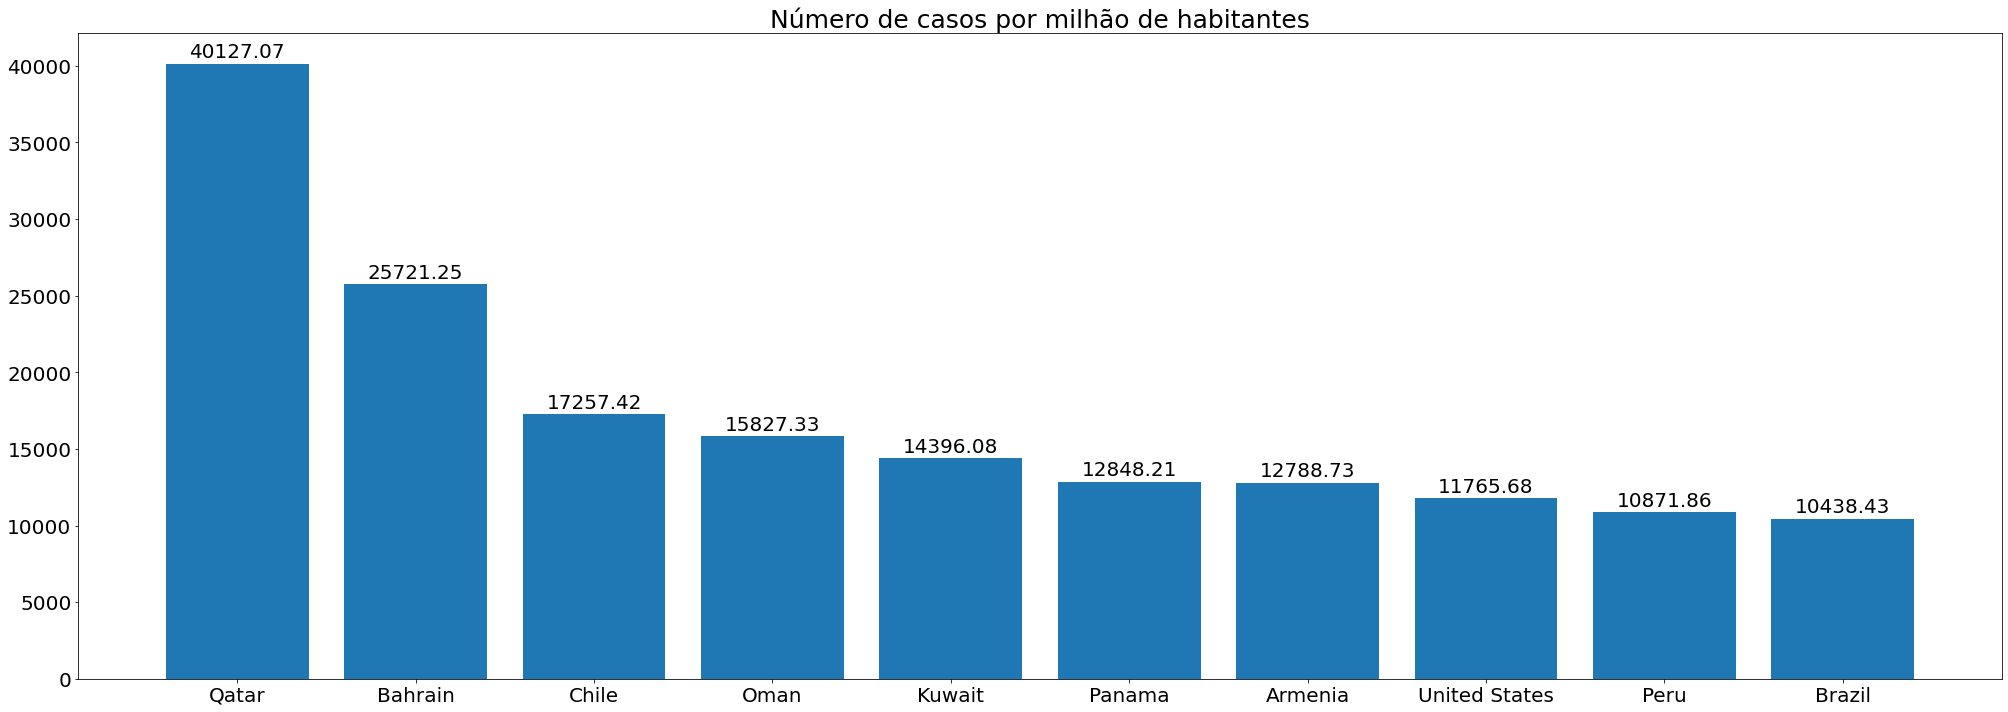

In [ ]:
bar_graph(covid_countries[covid_countries['population']>1000000], 'total_cases_per_million', 10, upper_date, 'float', 'Número de casos por milhão de habitantes')

Quanto aos testes, colocaremos a evolução ao longo dos seis meses tanto dos testes diários quando dos testes diários a cada mil habitantes, limitados aos 5 países que mais testaram de maneira absoluta e relativa, respectivamente. 

Aqui, Rússia e Estados Unidos aparecem em ambos os *displays*, mostrando o alto investimento de ambos os países no controle da doença.

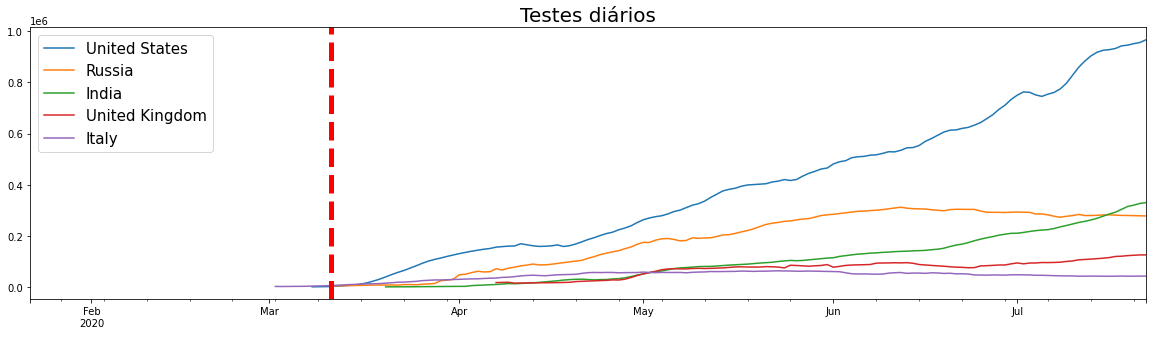

In [ ]:
# número de testes diários - absoluto
plot_linegraph('total_tests', 5, covid_countries, 'new_tests_smoothed', 'Testes diários')

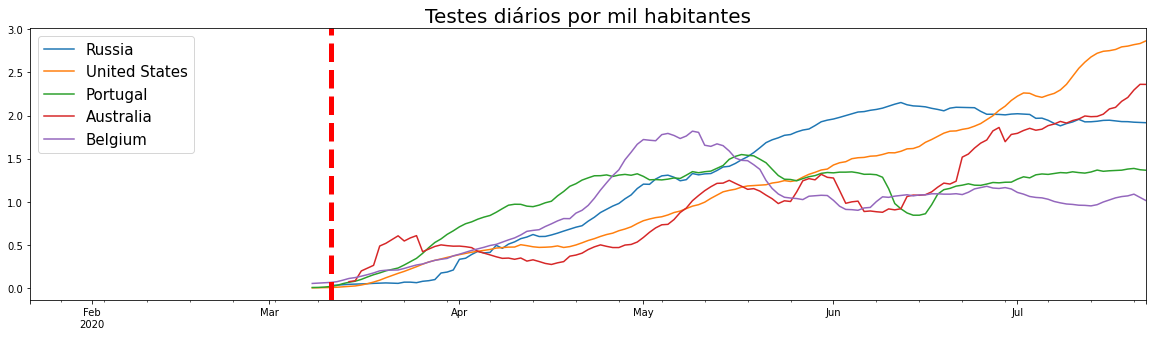

In [ ]:
plot_linegraph('total_tests_per_thousand', 5 , covid_countries[covid_countries['population']>10000000], 'new_tests_smoothed_per_thousand', 'Testes diários por mil habitantes')

Finalmente, nesse trecho, informamos alguns números sobre as mortes nos primeiros 6 meses. O primeiro gráfico trata dos países com maior número absoluto de mortes. O segundo mostra os países com maiores taxas de mortalidade nesse mesmo período. Em ambos, destacamos a presença de Itália, França, Reino Unido, Peru e México. 

O último gráfico mostra um histograma com uma distribuição dos países pelo número de mortes por milhão, considerando apenas aqueles com valores acima de 200.

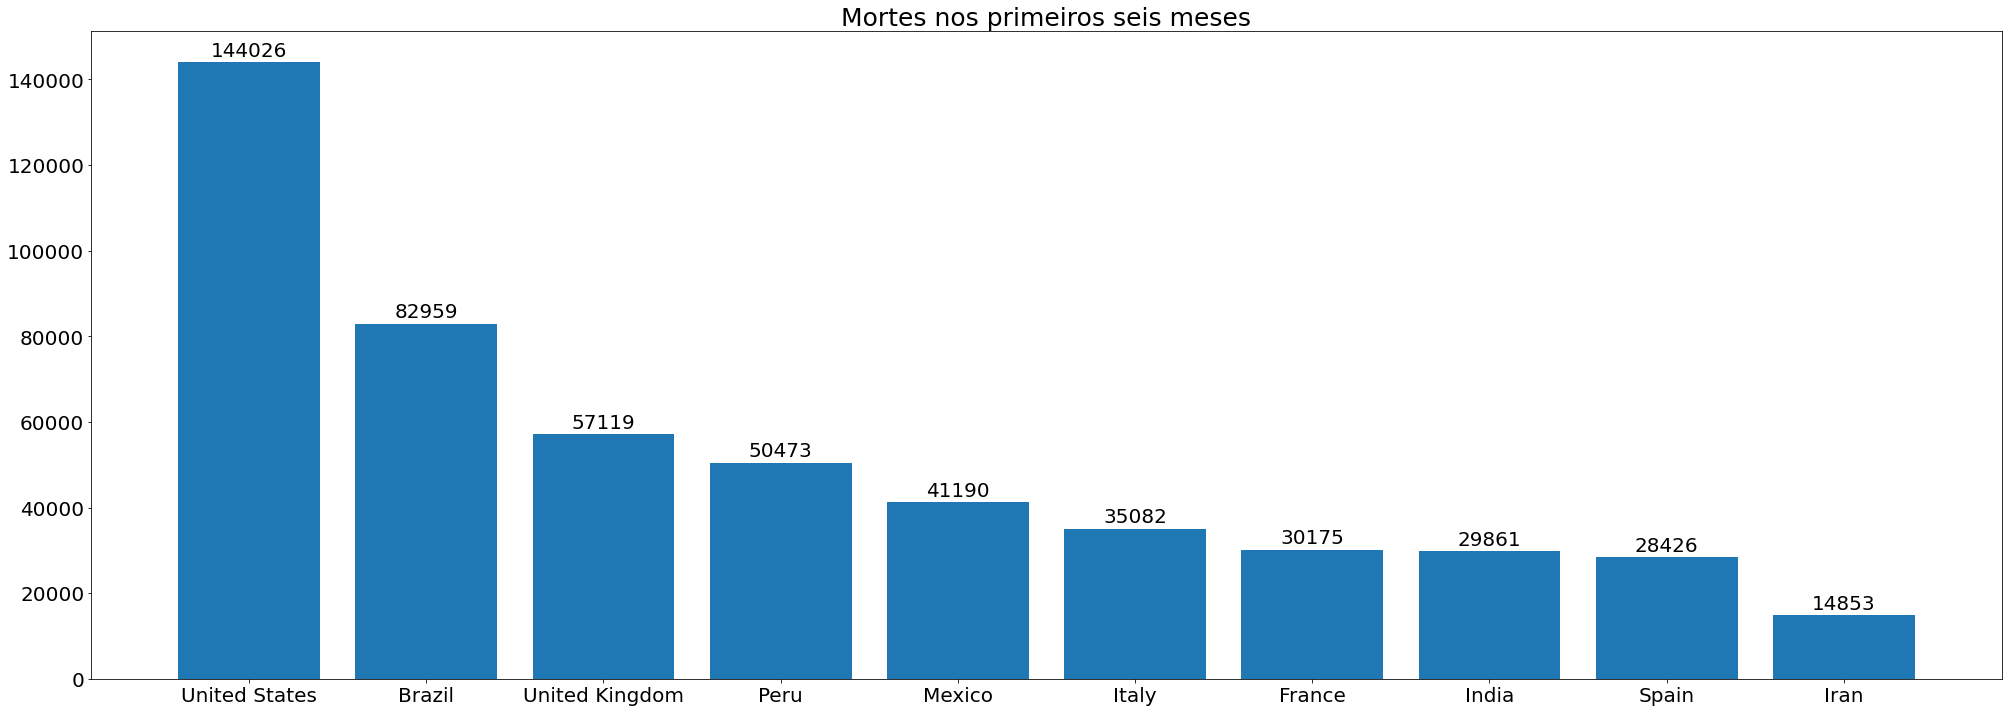

In [ ]:
bar_graph(covid_countries, 'total_deaths', 10, upper_date, 'int', "Mortes nos primeiros seis meses")

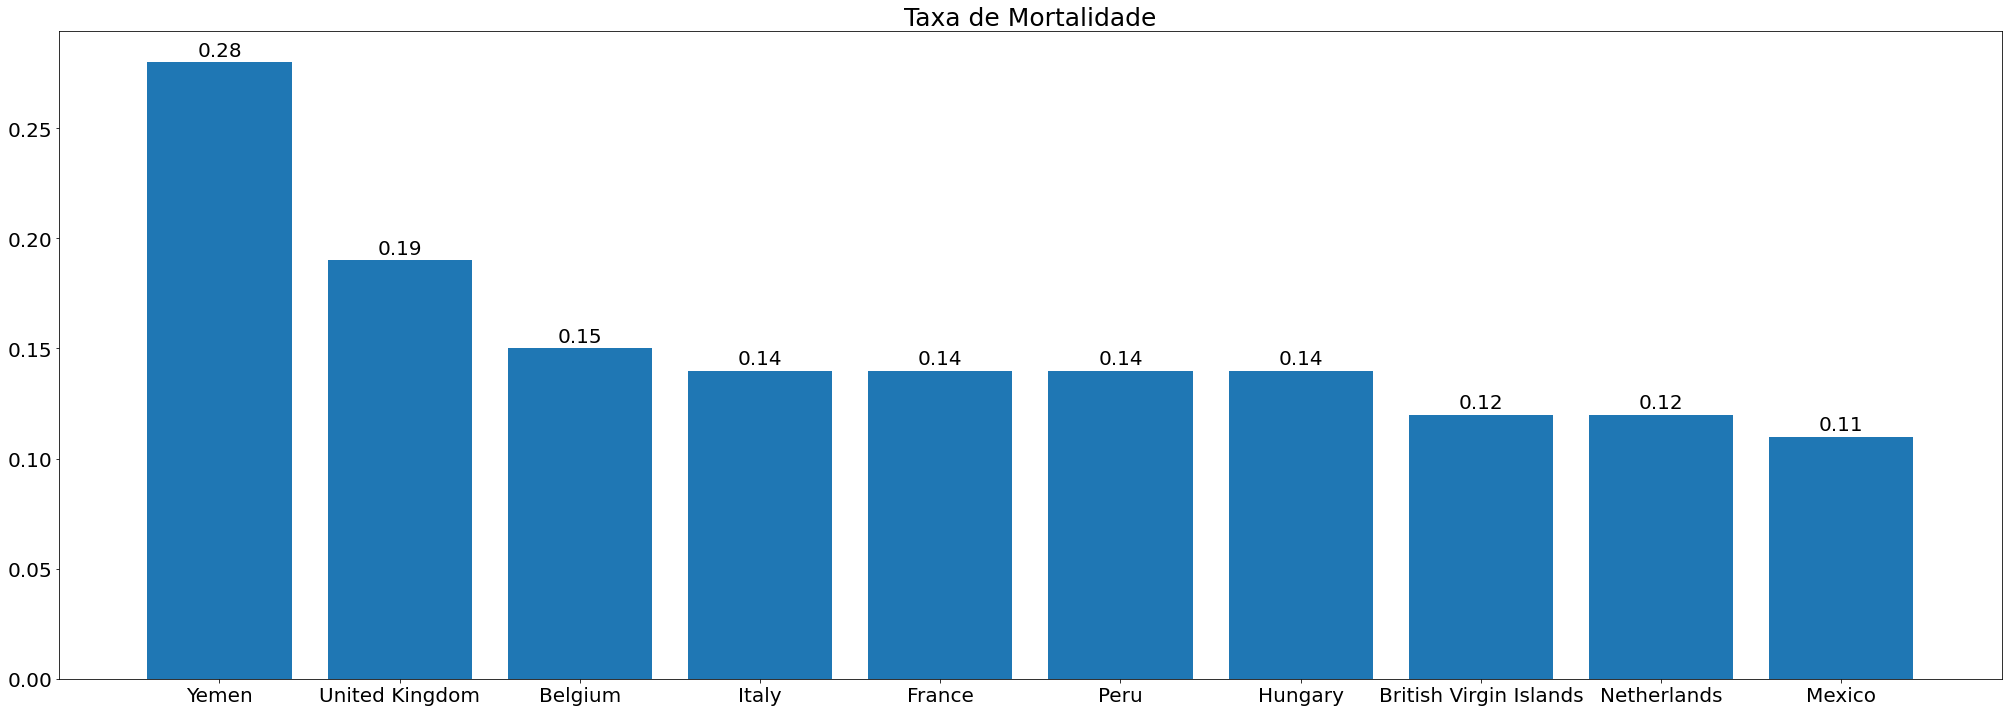

In [ ]:
df=covid_countries[covid_countries['total_deaths'].isnull()==False].copy()
df
df['mortality_rate']=df['total_deaths']/df['total_cases']
bar_graph(df, 'mortality_rate', 10, upper_date, 'float', "Taxa de Mortalidade")

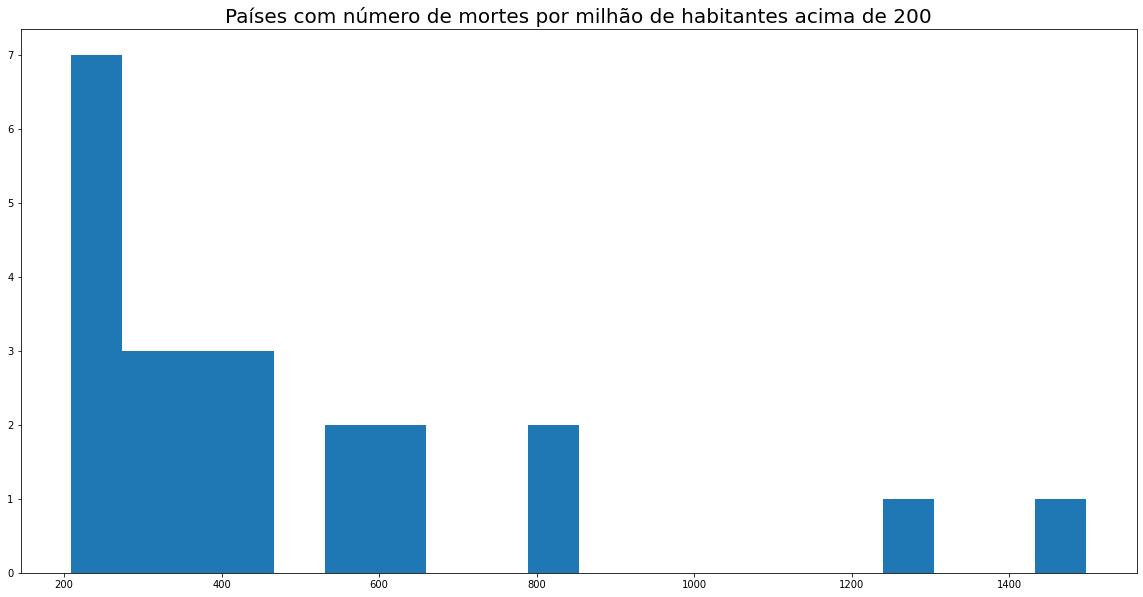

In [ ]:
#deaths_histogram
deaths_6m=covid_countries[(covid_countries['date']==upper_date) & (covid_countries['total_deaths_per_million']>200)].copy()
fig, ax = plt.subplots(figsize=(20,10))
ax.hist('total_deaths_per_million', data=deaths_6m, bins=20)
plt.title('Países com número de mortes por milhão de habitantes acima de 200', {'size': 20})
plt.show()

## Vacinação

A esperança mais concreta que se tinha para frear, ou possivelmente finalizar, a pandemia era a produção e aplicação de vacinas. Diversos governos e organizações empreenderam grandes esforços para que isso ocorresse. Felizmente, vários laboratórios chegaram a versões efetivas da vacina, e pudemos iniciar campanhas de vacinação ao redor do mundo.

Como podemos ver abaixo, a primeira dose foi aplicada no dia 4 de dezembro de 2020, ainda no fim do ano em que a pandemia se iniciou, mostrando quão impressionante foi o trabalho de todos os cientistas envolvidos nas pesquisas.

In [ ]:
covid_world[covid_world['total_vaccinations'] > 0]['date'].min()

Timestamp('2020-12-04 00:00:00')

Aqui, definiremos uma função auxiliar, que recebe uma localidade `location` e uma coluna `col` que consta em `covid_world` e nos retorna o *subdataset* de `covid_world` com as mesmas colunas, apenas as entradas de localidade igual a `location` e apenas as linhas em que a coluna `col` tem valores diferentes de *null*.

In [ ]:
def dataset_location(location, col):
  df=covid_world[covid_world['location'] == location]
  df=df[df[col].isnull()==False]
  return df

Nos dois gráficos abaixo, temos os 10 países que mais vacinaram por centena de habitantes e os que mais imunizaram por centena de habitantes, respectivamente. 

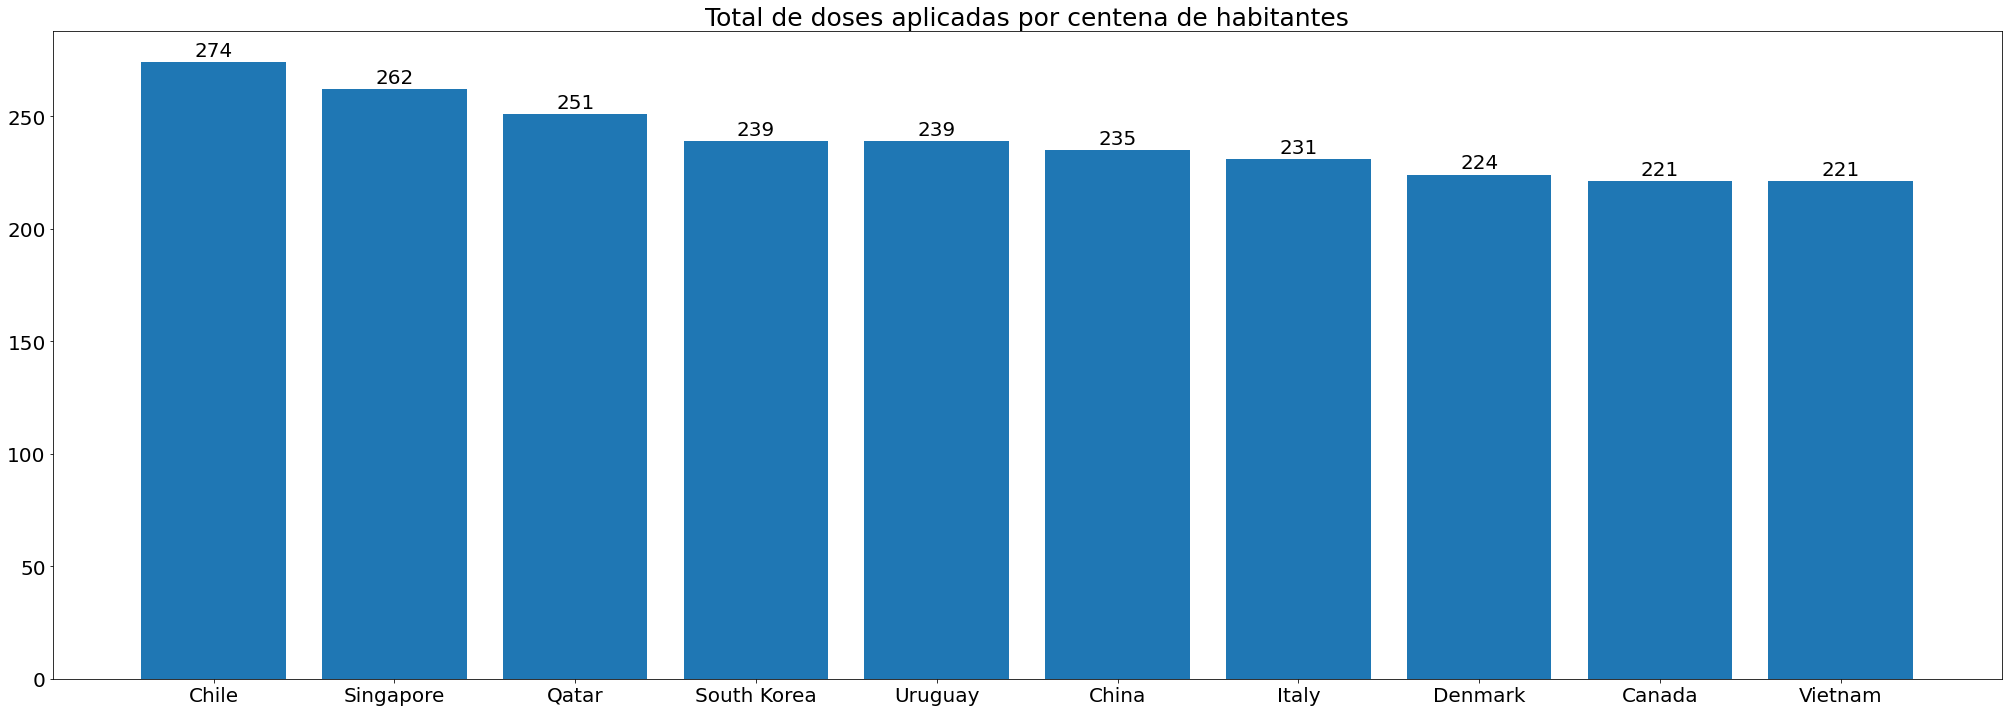

In [ ]:
bar_graph(covid_countries[covid_countries['population']>1000000], 'total_vaccinations_per_hundred', 10, pd.Timestamp(2022, 5, 7, 0), 'int', "Total de doses aplicadas por centena de habitantes")

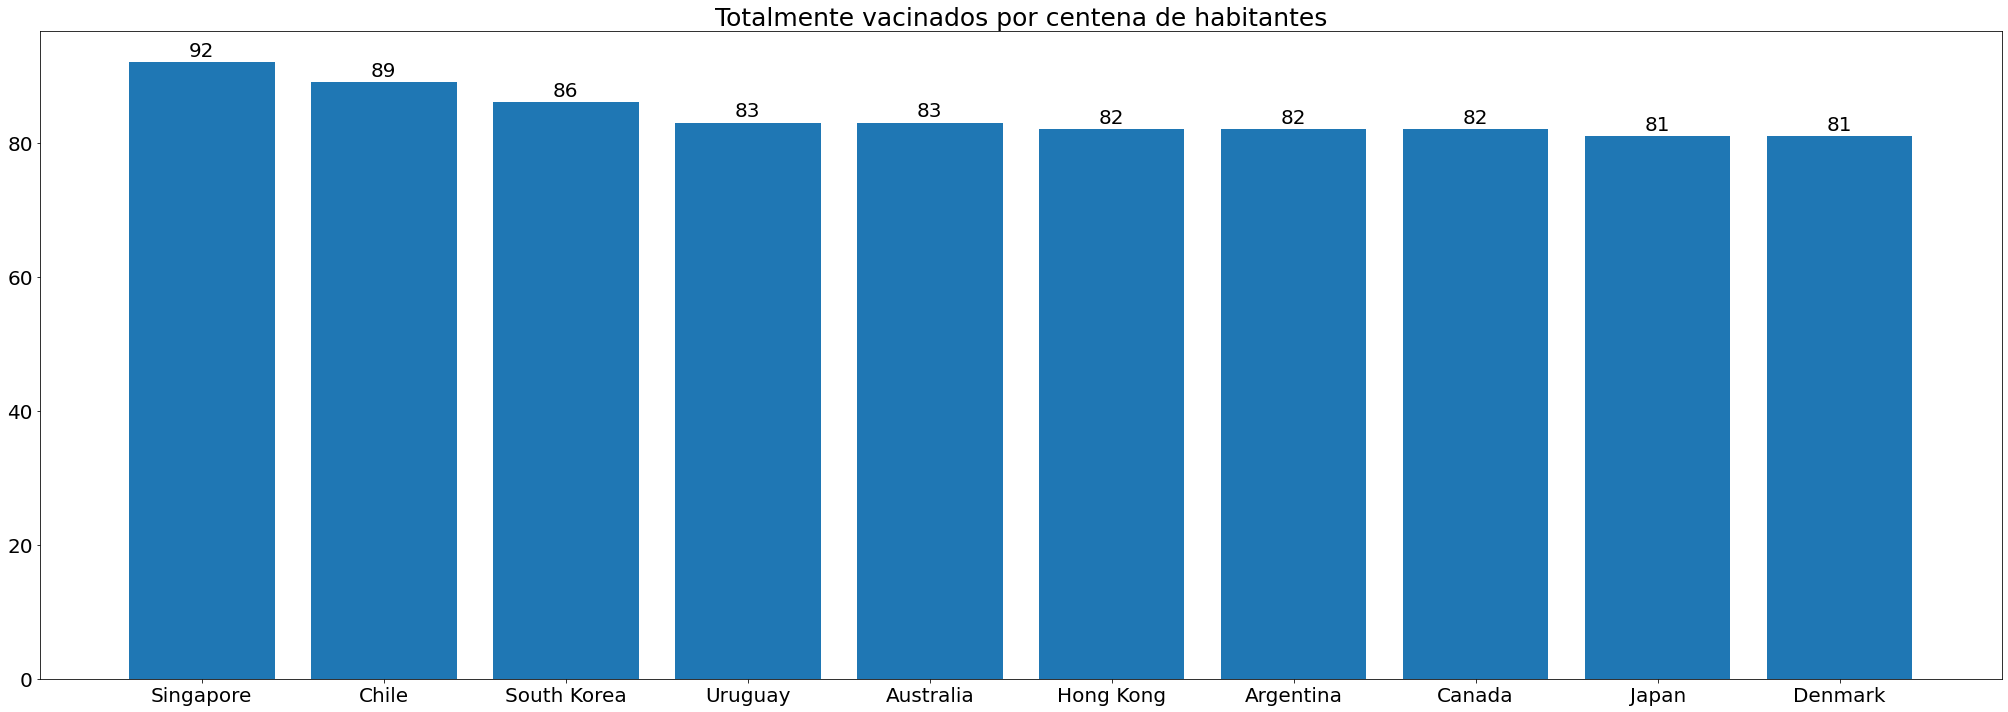

In [ ]:
bar_graph(covid_countries[covid_countries['population']>1000000], 'people_fully_vaccinated_per_hundred', 10, pd.Timestamp(2022, 5, 7, 0), 'int', "Totalmente vacinados por centena de habitantes")

Abaixo, construímos um *heatmap* usando variáveis de mortes e vacinações relativos aos dados mundiais. Notemos a correlação negativa entre a variável de novas mortes e as variáveis de vacinação.

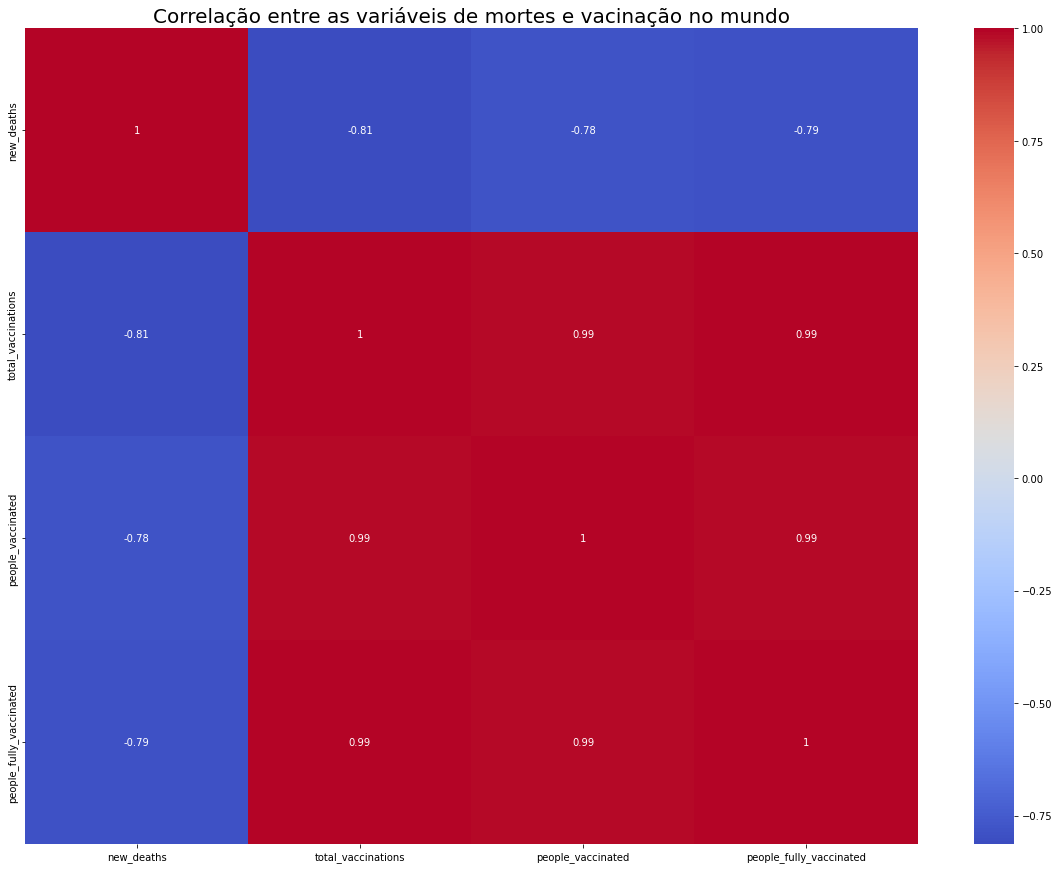

In [ ]:
colunas=['new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
new_deaths_smoothed_corr = dataset_location("World", 'total_vaccinations')[colunas].corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(new_deaths_smoothed_corr, cmap='coolwarm', annot=True)
plt.title('Correlação entre as variáveis de mortes e vacinação no mundo', {'size': 20})
plt.show()

# Resumo da situação atual

Nessa última seção, faremos um rápido apanhado de alguns indicadores levantados até a data mais atual (01 de outubro), bem como checaremos possíveis correlações entre o total de casos e de mortes por milhão de habitantes e alguns indicadores de cada país.

Nos três primeiros gráficos, mostraremos a evolução do número de novos casos ao longo dos dias, e gráficos com o número absoluto e relativo de mortes, respectivamente.

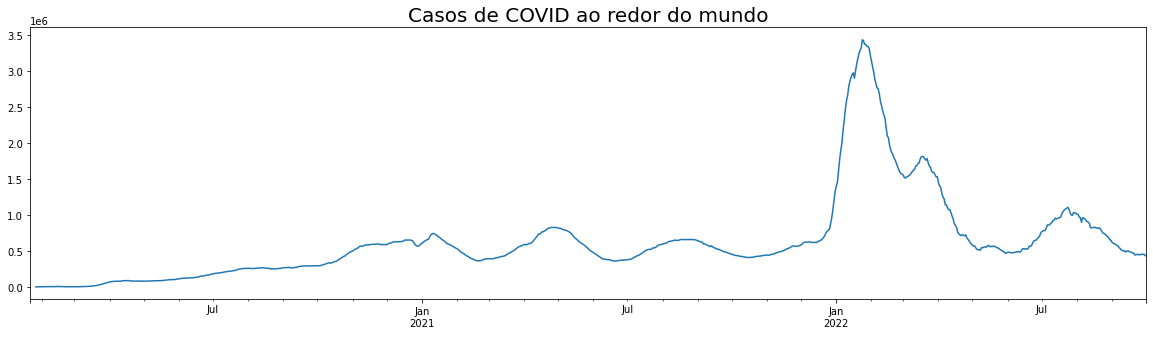

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
df = covid_world.loc[covid_world.location == "World"].set_index('date')
df['new_cases_smoothed'].plot(kind='line', ax=ax)
ax.set_title("Casos de COVID ao redor do mundo", fontsize=20)
ax.set_xlabel(" ")
plt.show()

In [ ]:
covid_world['date'].max()

Timestamp('2022-10-01 00:00:00')

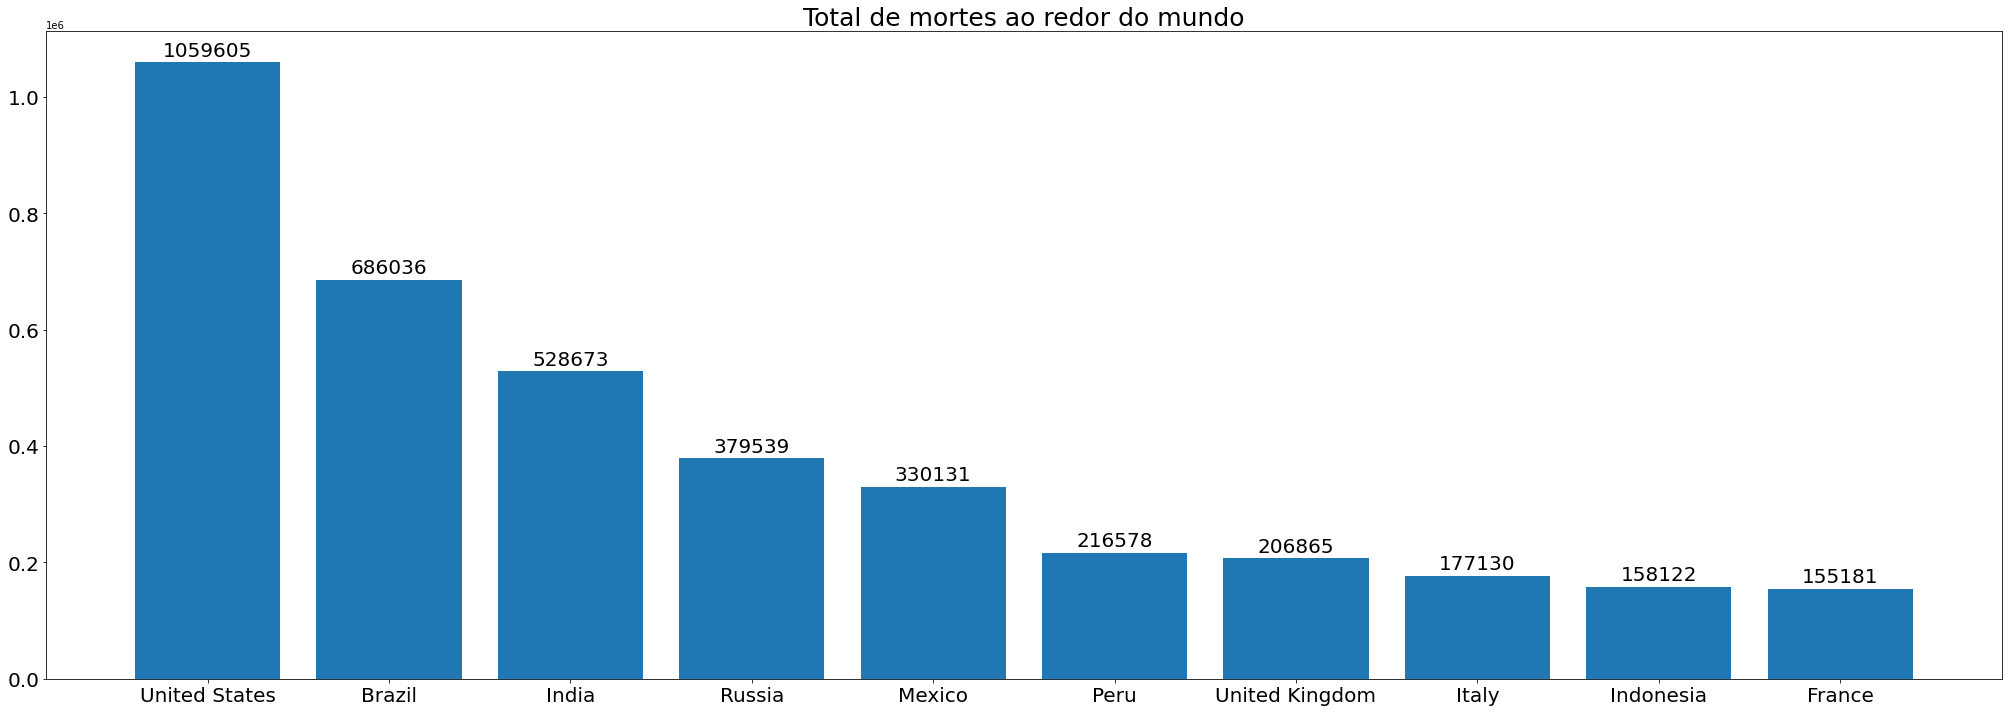

In [ ]:
bar_graph(covid_countries, 'total_deaths', 10, covid_world['date'].max(), 'int', 'Total de mortes ao redor do mundo')

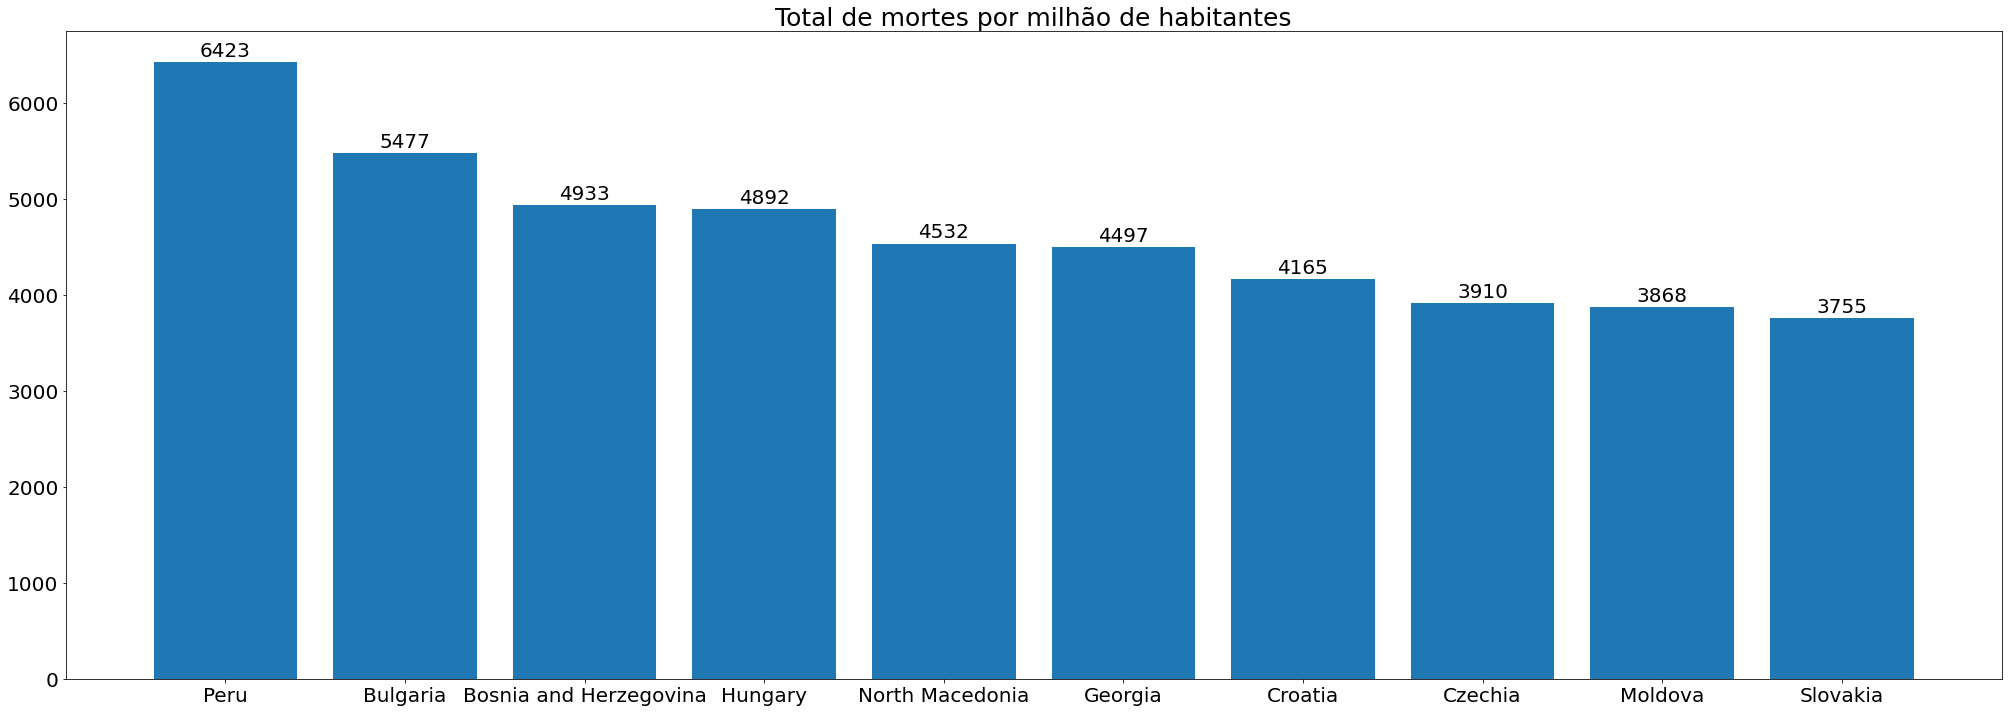

In [ ]:
bar_graph(covid_countries[covid_countries.population > 1000000], 'total_deaths_per_million', 10, covid_world['date'].max(), 'int', 'Total de mortes por milhão de habitantes')

Adicionamos aqui uma corrida de gráfico de barras, mostrando a evolução mensal do número de mortes entre os países.

In [ ]:
covid_world_1=covid_world[covid_world['date'].dt.day == 1]
data_list=list(covid_world_1['date'].unique())
covid_world_1.set_index(['location', 'date'], inplace=True)

In [ ]:
loc_list=[x for x in list(covid_world['location'].unique()) if x not in exceptions]
df_bcr=pd.DataFrame(index=data_list)
for local in loc_list:
  df=covid_world_1.loc[local, 'total_deaths'].copy()
  df.name=local
  df_bcr=pd.concat([df_bcr, df], axis=1)
df_bcr.dropna(axis=1, how='all', inplace=True)
df_bcr.dropna(axis=0, thresh=10, inplace=True)
df_bcr.fillna(value=0, axis=0, inplace=True)
#df_bcr

In [ ]:
bcr.bar_chart_race(df=df_bcr, n_bars=10, title='Países com mais mortes por COVID-19', period_length=500, filename=None)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0,

Finalmente, adicionaremos alguns gráficos de dispersão relacionando o número de casos e de mortes por milhão de habitantes com dados dos países, como PIB *per capita* e densidade populacional.

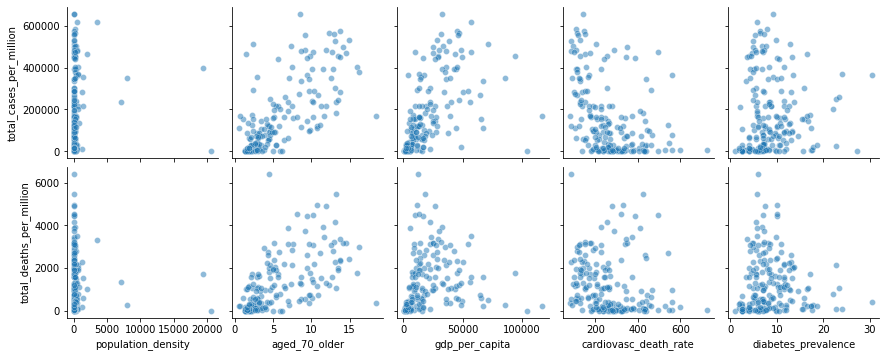

In [ ]:
covid_recent=covid_countries[covid_countries['date']==pd.Timestamp(2022, 10, 1, 0)]
columns_list=['total_cases_per_million', 'total_deaths_per_million', 'population_density', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence']
df_scatter_plots=covid_recent[columns_list]
sns.pairplot(data=df_scatter_plots, x_vars=columns_list[2:], y_vars=columns_list[:2], plot_kws={'alpha':0.5});

O plot acima serve como motivação para evitarmos *outliers*. Inicialmente, limitemos o valor máximo da densidade demográfica a 1000:

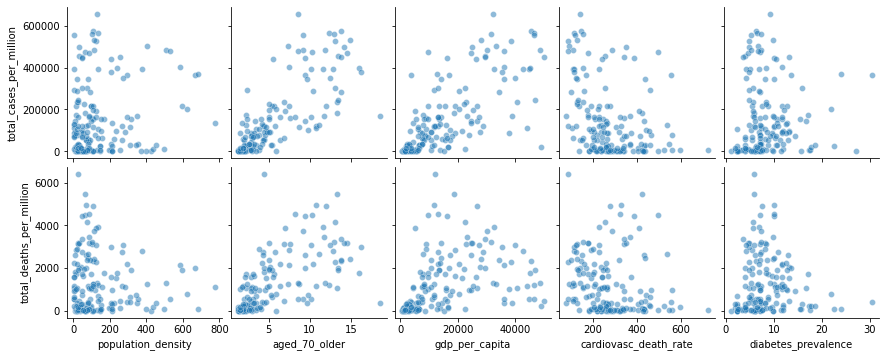

In [ ]:
df_scatter_plots = df_scatter_plots[(df_scatter_plots['population_density']<=1000) & (df_scatter_plots['gdp_per_capita']<=50000)]
sns.pairplot(data=df_scatter_plots, x_vars=columns_list[2:], y_vars=columns_list[:2], plot_kws={'alpha':0.5});

Agora, melhoraremos o plot anterior. Veja o resultado abaixo:

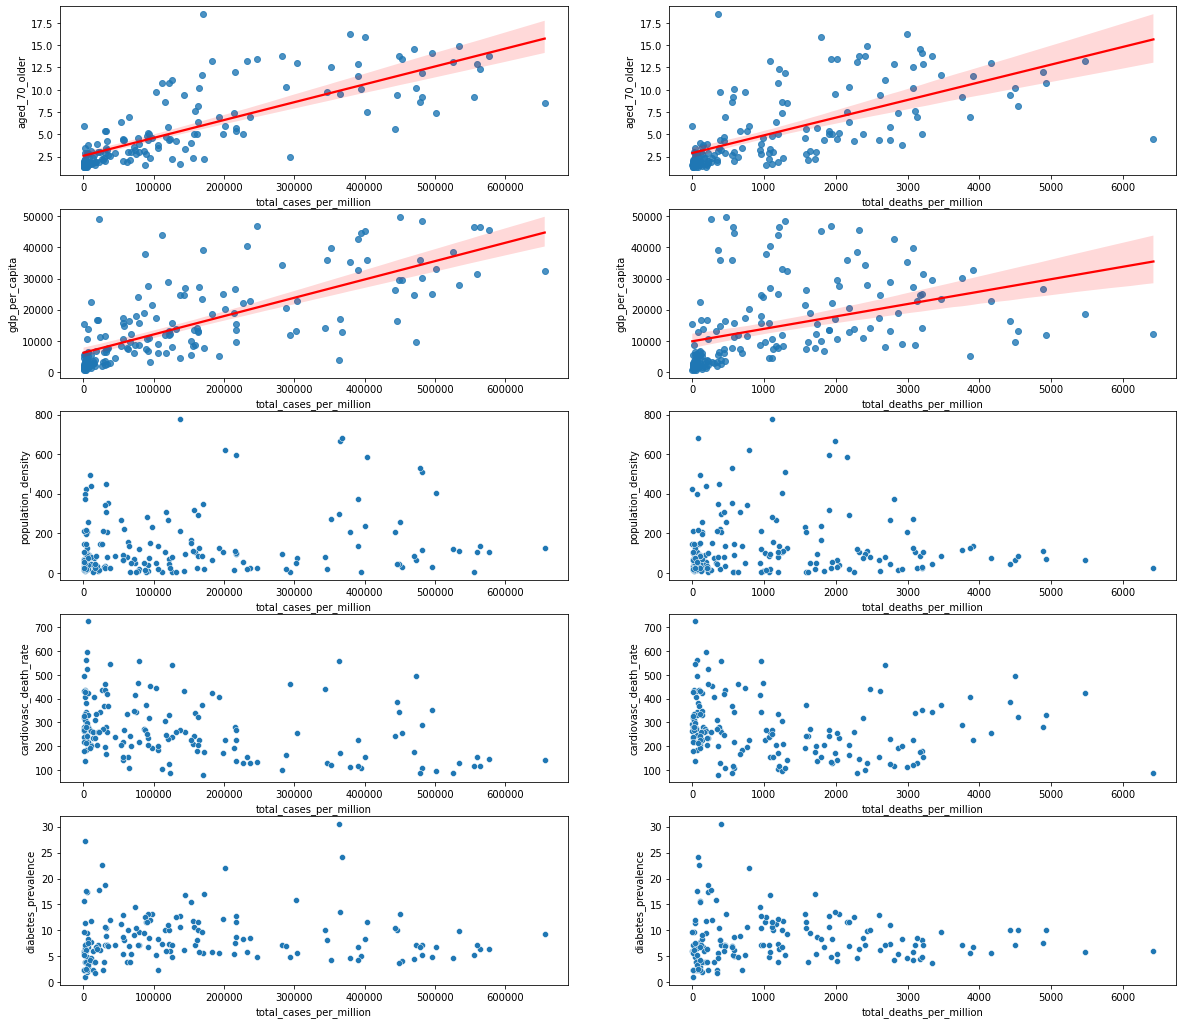

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,18))
rows_list=['aged_70_older', 'gdp_per_capita', 'population_density', 'cardiovasc_death_rate', 'diabetes_prevalence']
columns_list=['total_cases_per_million', 'total_deaths_per_million']
for column in columns_list:
  for row in rows_list:
    if rows_list.index(row)<2:
      sns.regplot(x=column, y=row, data=df_scatter_plots, line_kws={'color': 'red'}, ax=ax[rows_list.index(row), columns_list.index(column)])
    else:
      sns.scatterplot(x=column, y=row, data=df_scatter_plots, ax=ax[rows_list.index(row), columns_list.index(column)])

### Apêndice: Análise Exploratória para o Brasil


Aqui, faremos uma breve explanação sobre o quadro da COVID no Brasil.
Começaremos limitando o dataset aos dados do Brasil e indexando os dados pela data: 

In [ ]:
covid_brasil=covid_world[covid_world['location']=='Brazil'].copy()
covid_brasil.set_index('date', drop=True, inplace=True)

Agora, plotaremos um gráfico com o número de novos casos registrados até a data atual. Note o máximo do gráfico no início de 2022, quando surgiu a variante ômicron na África do Sul.

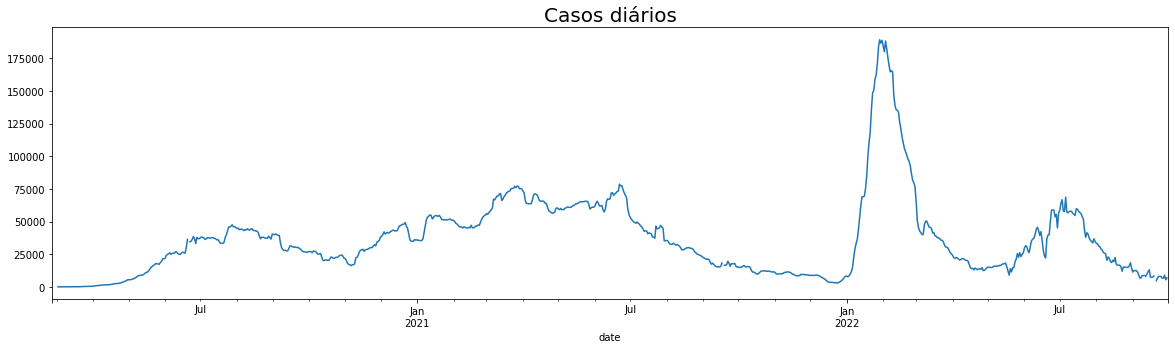

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
covid_brasil['new_cases_smoothed'].plot(kind='line', ax=ax)
ax.set_title("Casos diários", fontsize=20)
plt.show()

Temos abaixo um gráfico das novas mortes ao longo do tempo. Note que o momento do pico de casos não é um pico global no número de mortes, evidenciando que a variante ômicron seria menos letal que as demais (ao menos em números absolutos), sem mencionar o impacto positivo da campanha de vacinação no Brasil. De todo modo, verificamos que o pico absoluto é atingido nos primeiros meses de abril, período em que surgiu a variante P.1 em Manaus (veja o [link](https://www.cnnbrasil.com.br/saude/variante-da-covid-19-descoberta-em-manaus-esta-presente-em-52-paises/) para mais informações).  

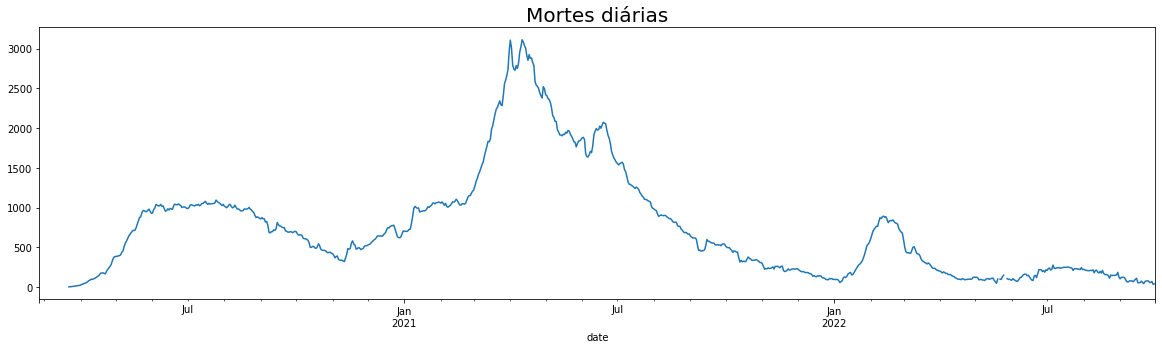

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
covid_brasil['new_deaths_smoothed'].plot(kind='line', ax=ax)
ax.set_title("Mortes diárias", fontsize=20)
plt.show()

Notemos agora que o primeiro caso de COVID foi registrado dia 26 de fevereiro de 2020, e a primeira morte registrada no Brasil ocorreu no dia 17 de março de 2020. 

In [ ]:
first_case_date_ts=covid_brasil['new_cases'].dropna(axis=0).index[0]
first_death_date_ts=covid_brasil['new_deaths'].dropna(axis=0).index[0]
first_case_date_dt=first_case_date_ts.to_pydatetime()
first_death_date_dt=first_death_date_ts.to_pydatetime()
difference_time = len(covid_brasil.loc[first_case_date_ts:first_death_date_ts]) + 1
print(f'''O primeiro caso de COVID registrado no Brasil foi em {first_case_date_dt.day}/{first_case_date_dt.month}/{first_case_date_dt.year}, enquanto a primeira morte por COVID registrada foi no dia {first_death_date_dt.day}/{first_death_date_dt.month}/{first_death_date_dt.year}. 
Temos que {difference_time} dias separam uma ocorrência da outra.''')

O primeiro caso de COVID registrado no Brasil foi em 26/2/2020, enquanto a primeira morte por COVID registrada foi no dia 17/3/2020. 
Temos que 22 dias separam uma ocorrência da outra.


Por fim, plotaremos gráficos de casos e mortes totais, tanto em escala linear como em logarítmica.

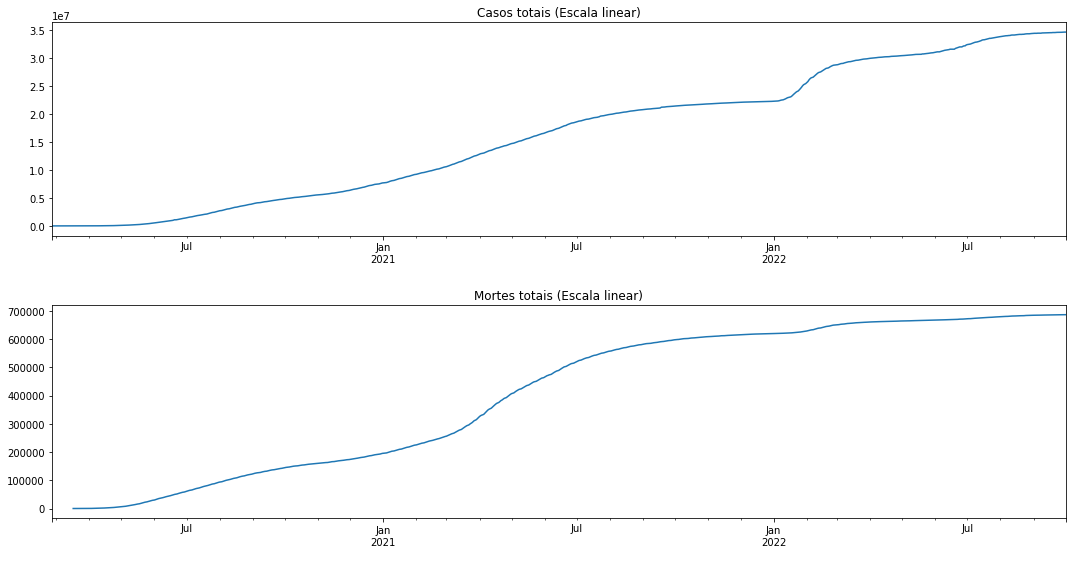

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
covid_brasil['total_cases'].plot(kind='line', ax=ax[0])
ax[0].set_title("Casos totais (Escala linear)")
ax[0].set_xlabel(" ")
covid_brasil['total_deaths'].plot(kind='line', ax=ax[1])
ax[1].set_title("Mortes totais (Escala linear)")
ax[1].set_xlabel(" ")
plt.tight_layout()
plt.show()

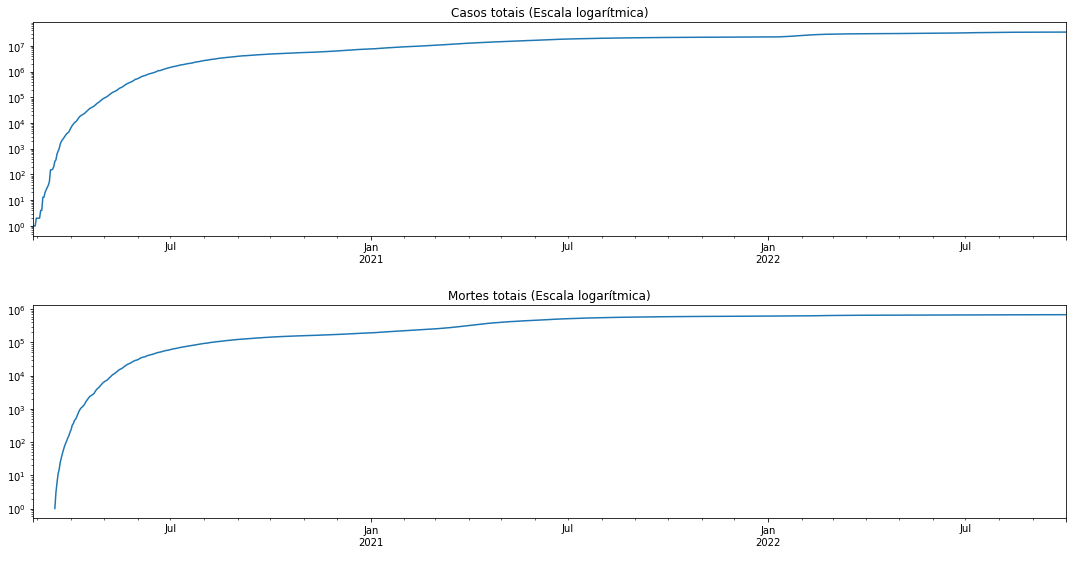

In [ ]:
fig2, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
covid_brasil['total_cases'].plot(kind='line', ax=ax[0])
ax[0].set_title("Casos totais (Escala logarítmica)")
ax[0].set_xlabel(" ")
ax[0].set_yscale("log")
covid_brasil['total_deaths'].plot(kind='line', ax=ax[1])
ax[1].set_title("Mortes totais (Escala logarítmica)")
ax[1].set_xlabel(" ")
ax[1].set_yscale("log")
plt.tight_layout()
plt.show()

## Conclusão

Com base nos dados expostos acima, conseguimos ter uma visão geral de como a COVID impactou o mundo, especialmente quanto ao número de casos, mortes e de vacinações.

O estudo acima pode servir como motivação para uma investigação mais ampla sobre a COVID, considerando, por exemplo, o impacto do uso de máscaras no controle da disseminação do vírus, ou uma análise de *tweets* feitos na época sobre a COVID. Naturalmente, tais investigações demandariam bases de dados complementares.

